<a href="https://colab.research.google.com/github/nklsrmy/CCDATSCL_ASSIGNMENT_COM222/blob/main/CCDATSCL_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Exam

## Grading Rubric

Each question is worth 20 points. The answer to each question will be graded in terms of:


* Correct Analysis & Computation `(8 points)`
  - Correct use of pandas operations (groupby, aggregation, filtering).
  - Accurate statistics or summaries.

* Appropriate Use of Visuals / Tables — `(6 points)`
  - Visualization or table is relevant to the question.
  - Plot type is appropriate (bar, boxplot, line, etc.).
  - Labels and axes are clear.


* Interpretation and Reasoning — `(6 points)`
  - Conclusions are clearly stated.
  - Interpretations are supported by data.
  - Reasoning is logical and coherent.

## Variable Definitions

* **hotel**
  - H1 = Resort Hotel
  - H2 = City Hotel

* **is_canceled** - Value indicating if the booking was canceled.
  - (1) canceled
  - (0) not canceled

* **lead_time** - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* **arrival_date_year** - Year of arrival date

* **arrival_date_month** - Month of arrival date

* **arrival_date_week_number** - Week number of year for arrival date

* **arrival_date_day_of_month** - Day of arrival date

* **stays_in_weekend_nights** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

* **stays_in_week_nights** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

* **adults** - Number of adults

* **children** - Number of children

* **babies** - Number of babies

* **meal** - Type of meal booked. Categories are presented in standard hospitality meal packages:
  - Undefined/SC – no meal package.
  - BB – Bed & Breakfast.
  - HB – Half board (breakfast and one other meal – usually dinner).
  - FB – Full board (breakfast, lunch and dinner)

* **country** - Country of origin. Categories are represented in the ISO 3155–3:2013 format

* **market_segment** - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **distribution_channel** - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **is_repeated_guest** - Value indicating if the booking name was from a repeated guest.
  - 1 is a repeated guest.
  - 0 is not a repeated guest.

* **previous_cancellations** - Number of previous bookings that were cancelled by the customer prior to the current booking

* **previous_bookings_not_canceled** - Number of previous bookings not cancelled by the customer prior to the current booking

* **reserved_room_type** - Code of room type reserved. Code is presented instead of designation for anonymity reasons.

* **assigned_room_type** - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

* **booking_changes** - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

* **deposit_type** - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

  - No Deposit – no deposit was made.
  - Non Refund – a deposit was made in the value of the total stay cost.  
  - Refundable – a deposit was made with a value under the total cost of stay.

* **agent** - ID of the travel agency that made the booking

* **company** - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

* **days_in_waiting_list** - Number of days the booking was in the waiting list before it was confirmed to the customer

* **customer_type** - Type of booking, assuming one of four categories:   

  - Contract - when the booking has an allotment or other type of contract associated to it.
  - Group – when the booking is associated to a group.
  - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking.
  - Transient-party – when the booking is transient, but is associated to at least other transient booking

* **adr** - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

* **required_car_parking_spaces** - Number of car parking spaces required by the customer

* **total_of_special_requests** - Number of special requests made by the customer (e.g. twin bed or high floor)

* **reservation_status** - Reservation last status, assuming one of three categories:
  - Canceled – booking was canceled by the customer.
  - Check-Out – customer has checked in but already departed.
  - No-Show – customer did not check-in and did inform the hotel of the reason why

* **reservation_status_date** - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'hotel-booking-demand' dataset.
Path to dataset files: /kaggle/input/hotel-booking-demand


In [2]:
import os
import pandas as pd

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


## 1. Dataset Overview & Core Distributions `(20 points)`

**Question:** What do the shapes and spread of the `lead_time` and `adr` distributions suggest about typical booking behavior and extreme cases in this dataset?

Perform an exploratory analysis of the distributional characteristics of key numerical variables in the hotel booking dataset.

You must:
- Analyze the distribution of lead_time and adr
- Use appropriate summary statistics and visualizations to support your analysis
- Identify any skewness and/or outliers in these variables

In [3]:
# put your answer here
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df.shape

(119390, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [8]:
df[['lead_time', 'adr']].describe()

,lead_time,adr
count,119390.000000,119390.000000
mean,104.011416,101.831122
std,106.863097,50.535790
min,0.000000,-6.380000
25%,18.000000,69.290000
50%,69.000000,94.575000
75%,160.000000,126.000000
max,737.000000,5400.000000


<Axes: ylabel='Frequency'>

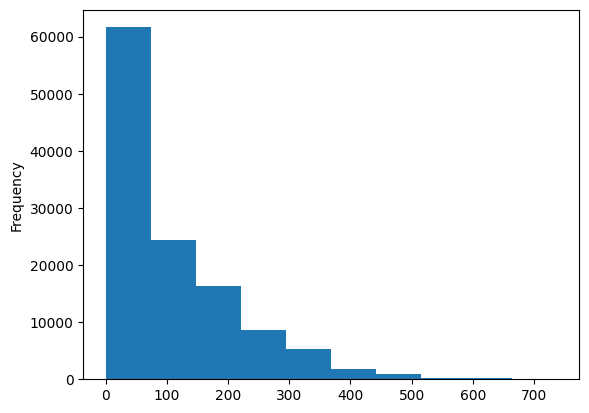

In [27]:
df['lead_time'].plot.hist()

<Axes: ylabel='Frequency'>

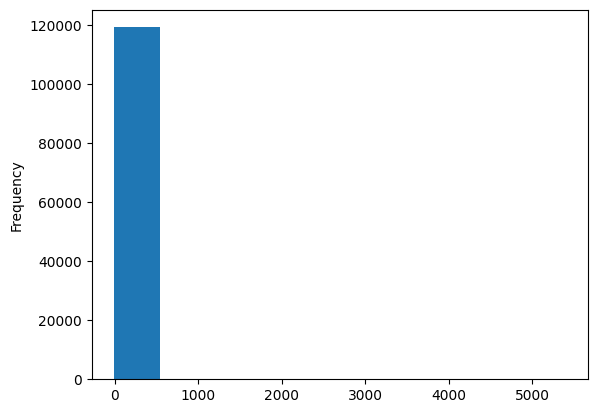

In [28]:
df['adr'].plot.hist()

## 2. Booking Cancellations and Lead Time `(20 points)`

**Question**: Do bookings with longer lead times tend to cancel more often?

Analyze how `lead_time` differs between canceled and non-canceled bookings.

You must:
- Compute appropriate summary statistics
- Use at least one visualization
- Clearly describe the pattern you observe



In [16]:
# put your answer here
df.groupby('lead_time')['is_canceled'].describe()

,count,mean,std,min,25%,50%,75%,max
lead_time,,,,,,,,
0,6345.0,0.067770,0.251370,0.0,0.0,0.0,0.0,1.0
1,3460.0,0.092775,0.290158,0.0,0.0,0.0,0.0,1.0
2,2069.0,0.102948,0.303965,0.0,0.0,0.0,0.0,1.0
3,1816.0,0.100220,0.300376,0.0,0.0,0.0,0.0,1.0
4,1715.0,0.102624,0.303556,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
622,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
626,30.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
629,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


## 3. Seasonality and Pricing `(20 points)`

**Question**: Do `Resort Hotels` and `City Hotels` exhibit different seasonal pricing behaviors throughout the year? If so, during which months are these differences most pronounced?

Analyze how Average Daily Rate (ADR) varies across arrival months, and compare this pattern between Resort Hotels and City Hotels.

You must:
- Aggregate ADR by month and hotel type
- Use a visualization to support your analysis
- Identify at least one seasonal pricing pattern

In [23]:
# put your answer here
df.pivot_table(index=['arrival_date_month', 'hotel'],
                      values=['adr'],
                      aggfunc='mean')

adr
arrival_date_month hotel                   
April              City Hotel    111.251838
                   Resort Hotel   77.849496
August             City Hotel    114.680455
                   Resort Hotel  186.790574
December           City Hotel     88.826307
                   Resort Hotel   68.984230
February           City Hotel     85.088278
                   Resort Hotel   55.171930
January            City Hotel     82.628986
                   Resort Hotel   49.461883
July               City Hotel    110.734292
                   Resort Hotel  155.181299
June               City Hotel    119.074341
                   Resort Hotel  110.444749
March              City Hotel     92.643116
                   Resort Hotel   57.520147
May                City Hotel    121.638560
                   Resort Hotel   78.758134
November           City Hotel     88.069601
                   Resort Hotel   48.273993
October            City Hotel     99.974498
                   Resort Hotel   62.097617
September          City Hotel    110.004661
                   Resort Hotel   93.252030

In [29]:
df.sort_values('arrival_date_month', ascending=True)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
87641,City Hotel,0,60,2016,April,17,18,1,4,2,...,No Deposit,9.0,NaN,0,Transient,110.5,0,0,Check-Out,2016-04-23
87091,City Hotel,0,26,2016,April,16,13,0,1,2,...,No Deposit,9.0,NaN,0,Transient,126.0,0,0,Check-Out,2016-04-14
87090,City Hotel,0,7,2016,April,16,13,0,1,1,...,No Deposit,138.0,NaN,0,Transient,90.0,0,0,Check-Out,2016-04-14
87089,City Hotel,0,21,2016,April,16,13,0,1,2,...,No Deposit,10.0,NaN,0,Transient,119.0,0,0,Check-Out,2016-04-14
87088,City Hotel,0,64,2016,April,16,11,1,2,2,...,No Deposit,9.0,NaN,0,Transient,105.3,0,1,Check-Out,2016-04-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8398,Resort Hotel,1,347,2016,September,40,26,2,5,2,...,No Deposit,253.0,NaN,0,Transient-Party,68.0,0,0,Canceled,2016-06-27
8397,Resort Hotel,0,542,2016,September,40,26,2,5,2,...,No Deposit,253.0,NaN,0,Transient-Party,87.0,0,3,Check-Out,2016-10-03
8396,Resort Hotel,1,19,2016,September,40,26,2,5,1,...,No Deposit,NaN,84.0,0,Transient,0.0,0,0,Canceled,2016-09-26
8404,Resort Hotel,1,339,2016,September,40,26,3,6,2,...,Non Refund,15.0,NaN,0,Transient,80.0,0,0,Canceled,2016-01-22


## 4. Customer Behavior `(20 points)`

**Question:** Do repeated guests behave differently from first-time guests?

Compare repeated guests and non-repeated guests in terms of:
- Cancellation rate
- Booking behavior (e.g., booking changes or lead time)
- Use summary statistics and/or visualizations to support your answer.


In [35]:
# put your answer here
df.groupby('is_repeated_guest')['previous_cancellations'].mean()

,previous_cancellations
is_repeated_guest,
0,0.074503
1,0.469816


In [36]:
df.pivot_table(index=['is_repeated_guest', 'previous_cancellations'],
                      values=['lead_time'],
                      aggfunc='mean')

lead_time
is_repeated_guest previous_cancellations            
0                 0                       100.925897
                  1                       215.919933
                  2                       101.125000
                  3                       186.846154
                  6                       113.000000
                  11                      190.000000
                  14                      265.000000
                  19                      244.000000
                  24                      205.000000
                  25                      222.000000
                  26                      275.000000
1                 0                        14.249740
                  1                       101.112554
                  2                        23.289474
                  3                        20.769231
                  4                        19.451613
                  5                         5.736842
                  6                         4.625000
                  11                        3.185185
                  13                      179.666667
                  21                      265.000000

## 5. Booking Cancellation Insights `(20 points)`

**Question:** Which combination of variables appears to have the strongest relationship with booking cancellations, and how do these variables interact to influence the likelihood of a cancellation?


Using at least three variables from the dataset, identify one strong pattern related to booking cancellations.

Your answer must:
- Clearly state the pattern
- Explain how the variables interact
- Support the conclusion with data


In [40]:
# put your answer here
booking_cancellation_pattern = (
    df. groupby(['deposit_type', 'is_repeated_guest'])['is_canceled']
    .mean()
    .reset_index()
)
booking_cancellation_pattern

,deposit_type,is_repeated_guest,is_canceled
0,No Deposit,0,0.289418
1,No Deposit,1,0.131480
2,Non Refund,0,0.993872
3,Non Refund,1,0.937500
4,Refundable,0,0.227848
5,Refundable,1,0.000000
